# Exercise W7D1: Review and Putting it All Together

This exercise aims to draw together the topics we have covered in the _Base Camp_ portion of the Digital Methods class. At the end of the exercise, you should have a `DataFrame` with each row containing information on a Twitter account including their tweets, friends, followers, hashtags and mentions as well as some descriptive statistics.

You will be able to reuse and modify this code for the second half of digital methods to download and analyze tweets for your projects. So, this exercise should provide you with a solid review of different things we have learned and help you for the the rest of the course.

**Exercise 1. Identify a topic, authenticate, and get data.** First, identify a topic of interest to you and think about a keyword or hashtag capturing the topic. Possible topics could be Corona or Climate, but you are welcome to choose something else. Then load the `tweepy` module and use the built-in functionality to `search` Twitter for your keyword or hashtag. Create a variable that contains the data returned by your search.

See [here](http://docs.tweepy.org/en/latest/api.html#help-methods) for more information about the `search` method.

Now we have an object containing a number of tweets pertaining to our topic of interest. As you might remember, by default the Twitter API returns the data to us in JSON format. Now that we know about the elegance and beauty of `DataFrames`, we would prefer to work with that format of data rather than a dictionary-style JSON. 

**Exercise 2. Turn raw API data into a DataFrame.** Your search returned a set of tweets about your chosen topic. Construct a `DataFrame` from your Twitter search object of the people who are tweeting about that topic that, at minimum, contains the unique `screen_names`, `followers_count`, `friends_count`, and `statuses_count` returned from your search. 

There are a number of ways to do this so you might want to review how to construct `DataFrames` (W6D1-Demo). You may also want to review navigating JSON objects (W4D2-Exercise_solutions). Also, your returned data might include the same account multiple times, so you will want to make sure that you are listing the account only once in your `DataFrame`.

With our neat `DataFrame` we can now easily find out details about the data we collected from Twitter.

**Exercise 3. Get information about our data.** Use the `print` function and string operations to make Python tell you in plain language: a) How many unique accounts there are in your data, b) what the name of the _last_ account in your data is, and c) what the sum of followers is for all accounts in your data. That is make Python print out full sentences with the relevant information.

**Exercise 4. Adding data to our DataFrame.** Loop through the indices of your `DataFrame`, collect the timeline for each account using the `user_timeline` method from tweepy, and store them in a new list "timelines". Note that you will want to build in some `sleep` time to avoid running into rate limits. You can find the syntax for how to do this on page 155 and the logic and examples on pages 209-12 in Brooker (2020).

Add your list "timelines" to your current `DataFame`. To do this, we first need to turn our list into a new `DateFrame` with one column labeled `timelines` and then join our two `DateFrames` horizontally, i.e. along `axis = 1`.

### Take a deep breath. This was a major piece of coding. 

Now you have the timeline, that is the statuses, for each of your accounts in the `DataFrame`. But these are still in the raw format which the Twitter API returns, so we need to transform them into a format that allows us to to work with them more easily. In the end, we want to get at the the topics and persons our accounts tweet about.

**Exercise 5. Getting the tweet texts from the timeline.** Extract the text from the tweets in each account's timeline, combine them into a list, turn the list of lists into a `DataFrame`, and join the new and old `DataFrames`. One way to do this is to 1) create an empty list 'tweets', 2) loop through the indices in your `DataFrame`, 3) for each index/row loop through the timeline, 4) create a temporary list, append the text for each timeline element to that list, then append the temporary list to 'tweets' 5) turn the list into a `DataFrame` and 6) merge the two `DataFrames` horizontally.

**Exercise 6. Turning our list of tweet texts into a long string.** To get a sense of what our accounts usually tweet about, it might be useful to have their tweets in one long string that allows us to easily count the words they use. Create a list that holds the long string of tweets for each user. We can concatenate our list of tweets/strings using the [join](https://docs.python.org/2/library/string.html#string.join) command for which you can find a usage example [here](https://stackoverflow.com/a/493842).

Turn the list into a `DataFrame` and merge it with your main `DataFrame` horizontally. 

**Exercise 7. Finding hashtags and mentions.** Now that we have all the tweets for each account in one long string, we can start looking at the topics the accounts are tweeting about and who they are interacting with. To do so, you can use the [`findall`](https://docs.python.org/3/library/re.html#re.findall) function from the `re` package to extract all hashtags (starting with a "#") and mentions (starting with an "@"). Add one column for hashtags and mentions respectively to your `DataFrame`.

**Exercise 8. Writing your insights to a file.** You have just generated some really awesome insights about the accounts you identified earlier. To share your insights, that is the topics/hashtags your accounts tweet about, you should now write the hashtags to a text file–if you want to remind yourself, we covered this in week 3 day 1. Can you make it so the text file first lists the name and then the hashtags the account uses?

**Exercise 9. Descriptive statistics about your accounts.** We closed last week with talking about descriptive statistics. For the accounts you gathered, there are at least three variables that you might be interested to know more about. What are the minimum, maximum, and mean for the number of followers, friends, and posted statuses in you data?

**Exercise 10. Visualizing influence.** To round off this exercise, let's plot some data from the accounts you collected. Make a bar plot to show which of the accounts has the most influence on Twitter. _Hint:_ You might want to look at `followers_count`.

**Exercise 11. Understanding influence.** Now that you know who is most influential among your accounts, try to see if the data you get from Twitter allows you to explore what might explain that influence. Look into your data and plot the follower count against another variable. Is there a pattern?

**THERE IS ALWAYS MORE.** If you got all the way through this exercise and are still hungry for more, here are some suggestions for other things you could do:

1. To get an even better sense of what your accounts tweet about than just using hashtags, you could count the most used words. Create a list that, for each account has a dictionary of the frequency of each word with stop words removed. Remember, you can reuse your code from W3D1. You can get a list of stop words from [here](http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words). These are also stored in `stop_words.txt`. Add a column to your dataframe for most used words. 
2. Extract the number of favorites and retweets from the timelines you gathered. Is there any relationship between the number of followers and these figures? How about between these figures and the number of friends?
3. Researchers often use Twitter because we can do respondent-driven sampling, i.e. we start with a few accounts and then collect the accounts that follow these accounts to get a broader picture of the network. Start exploring the networks of the accounts you collected using the [`followers`](https://tweepy.readthedocs.io/en/latest/api.html#API.followers) command.
4. Given that the accounts you collected are similar in that they tweet about your topic of choice, it might be interesting know if there are issues that distinguish the accounts. Researchers often use term frequency-inverse document frequency to study such differences. [Here](https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/) is a primer on the concept and a tutorial on how to implement it in Python. Can you find distinguishes your accounts from one another?

## EXAMPLE SOLUTIONS

**Exercise 1**

In [2]:
# we start by importing the tweepy module and loading our twitter credentials
# remember that the AppCred file needs to be in the same folder as your notebook
import tweepy
from AppCred import CONSUMER_KEY, CONSUMER_SECRET
from AppCred import ACCESS_TOKEN, ACCESS_TOKEN_SECRET

In [3]:
# then we set up our authentication to the twitter api
# and create an object that allows us to interface with the api
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [4]:
# now, we can use the `search` method to look around twitter for our keyword
# and store the returned data in an object we call `euro2020_tweets`
e2020_tweets = api.search("#EURO2020")

**Exercise 2**

In [8]:
import numpy as np
import pandas as pd

In [9]:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
created_at = []


for tweet in e2020_tweets:
    if (tweet._json['user']['screen_name'] not in screen_names):
        names.append(tweet._json['user']['name'])
        screen_names.append(tweet._json['user']['screen_name'])
        id_str.append(tweet._json['user']['id'])
        location.append(tweet._json['user']['location'])
        description.append(tweet._json['user']['description'])
        followers_count.append(tweet._json['user']['followers_count'])
        friends_count.append(tweet._json['user']['friends_count'])
        statuses_count.append(tweet._json['user']['statuses_count'])
        created_at.append(tweet._json['user']['created_at'])

In [10]:
e2020_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "created_at": created_at
}

e2020_df = pd.DataFrame(e2020_dictionary)

**Exercise 3**

In [11]:
print("a) There are " + str(e2020_df.name.count()) + " unique accounts in the data.")
print("b) The last account in my data is called " + str(e2020_df.name[12]))
print("c) The accounts in my data have a total of " + str(sum(e2020_df.followers_count)) + " followers.")

a) There are 15 unique accounts in the data.
b) The last account in my data is called lawrence
c) The accounts in my data have a total of 133809 followers.


**Exercise 4**

In [12]:
import time

In [13]:
timeline = []

for i in e2020_df.index:
    statuses = api.user_timeline(e2020_df.screen_name[i])
    timeline.append(statuses)
    time.sleep(5)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [16]:
timelines = pd.DataFrame({"timelines": timeline})
e2020_df = pd.concat([e2020_df, timelines], axis = 1)
e2020_df

,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,created_at,timelines,timelines,timelines
0,Polsat Sport,polsatsport,1111576250,Polska,Oficjalne konto serwisu Polsatsport.pl.,56728,426,49402,Tue Jan 22 13:38:59 +0000 2013,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...
1,Magarya #MNCH 🇳🇬,magarya,41401964,#next1000days #Race4Survival,"PRO with NYSC, I tweet and Re Tweet. I love in...",3948,4931,432294,Wed May 20 17:17:03 +0000 2009,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...
2,Andreas Kraul,KraulDR,154180801,Denmark,Journalist og kommentator på @drsporten,49751,1728,11560,Thu Jun 10 15:50:41 +0000 2010,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...
3,Reverse Flash,ashutoshnegi007,599823552,UK,mechanical Engineer..LFC & DC is life.,727,5001,46777,Tue Jun 05 02:10:56 +0000 2012,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...
4,Rinaldo Bianco,BiancoRinaldo,797184870,,,950,1102,49645,Sun Sep 02 00:43:50 +0000 2012,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...
5,mlkmls 💯,mlkmls_,1577017578,"Dortmund, Deutschland","enormes Tempodefizit, kann keine großen Räume ...",1342,306,3711,Mon Jul 08 07:46:24 +0000 2013,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...
6,Ricardo,Riiici94,177934229,,,3,75,3,Fri Aug 13 12:52:03 +0000 2010,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...
7,Joel Otou,OtouEbandaBienv,523553567,Cameroun,- Cool\n- Ingénieur Polytechnicien (électroméc...,63,761,7363,Tue Mar 13 18:53:14 +0000 2012,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...
8,Salem Al Dossari,SalemMesfer1,812899726500605952,إستغفِر الله و اتوب إليه,اللهم صلِّ و سلم على نبينا محمدﷺ LFC || FCiM |...,403,220,87490,Sun Dec 25 05:56:12 +0000 2016,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...
9,Vx_Ira 🍟🍫,VxvxIra,1155207682233704451,Abidjan Cote d’Ivoire 🇨🇮,🇨🇮...,97,138,270,Sat Jul 27 20:05:48 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...,[Status(_api=<tweepy.api.API object at 0x00000...


**Exercise 5**

In [ ]:
tweets = []

for i in e2020_df.index:
    tweets_no = len(e2020_df.timelines[i])
    temp_text = []
    for j in range(0,tweets_no):
        temp_text.append(e2020_df.timelines[i][j]._json["text"])
#         print(j)
    tweets.append(temp_text)
    print(i)

tweets = pd.DataFrame({"tweets": tweets})

e2020_df = pd.concat([e2020_df, tweets], axis = 1)

**Exercise 6**

In [ ]:
text = []

for i in e2020_df.index:
    text.append(" ".join(e2020_df['tweets'][i]))

text = pd.DataFrame({"text": text})

e2020_df = pd.concat([e2020_df, text], axis = 1)

**Exercise 7**

In [ ]:
import re

In [ ]:
mentions = []

for i in e2020_df.index:
    mentions.append(re.findall('@\S+', e2020_df['text'][i]))

mentions = pd.DataFrame({'mentions': mentions})

e2020_df = pd.concat([e2020_df, mentions], axis = 1)

In [ ]:
hashtags = []

for i in e2020_df.index:
    hashtags.append(re.findall('#\S+', e2020_df['text'][i]))

hashtags = pd.DataFrame({'hashtags': hashtags})

e2020_df = pd.concat([e2020_df, hashtags], axis = 1)

**Exercise 8**

In [ ]:
#Open the file in write mode
f = open('hashtags.txt','w', encoding = "utf-8")

#Loop through each tuple and write it as a string, with a new line
for i in e2020_df.index:
    f.write(str(e2020_df["name"][i]) + ": " + str(e2020_df["hashtags"][i]) + "\n")

#close the file.
f.close()

**Exercise 9**

In [ ]:
e2020_df.describe()

**Exercise 10**

In [18]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

C:\Users\Emil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Emil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56819 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Emil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Emil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Emil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Emil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57183 missing from current

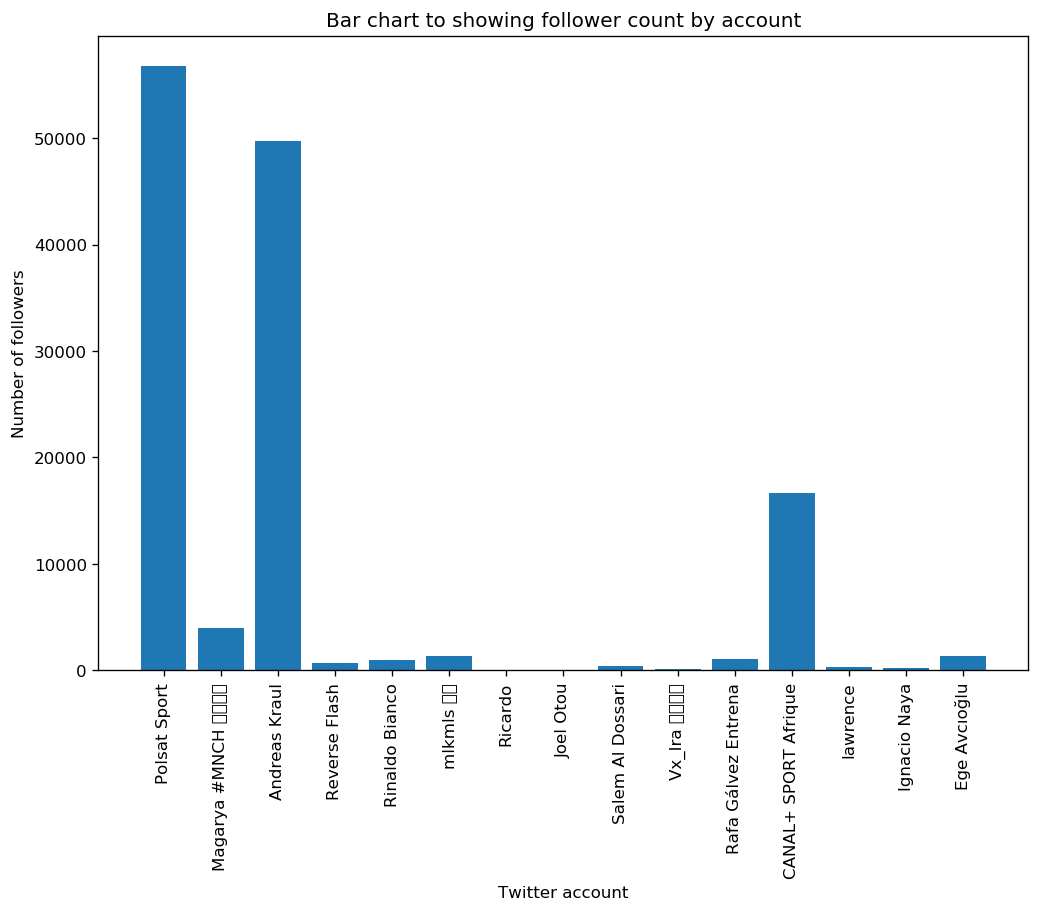

In [19]:
plt.figure(figsize=(10, 7), dpi= 120)

plt.bar(e2020_df["name"], e2020_df["followers_count"])

plt.title("Bar chart to showing follower count by account")
plt.xlabel("Twitter account")
plt.ylabel("Number of followers")
plt.xticks(rotation=90)

**Exercise 11**

In [ ]:
plt.figure(figsize=(10, 7), dpi= 120)

plt.plot(e2020_df["statuses_count"], e2020_df["followers_count"], "o")

plt.title("Scatter plot to showing follower count by status count")
plt.xlabel("Number of statuses posted")
plt.ylabel("Number of followers")
plt.xticks(rotation=90)

**Additional exercise. Counting word usage.**

In [ ]:
user_words = []

for i in e2020_df.index:
    word_dict = {}
    text = e2020_df.text[i].lower().split(' ')
    for word in text:
        if word not in word_dict:
            word_dict[word] = e2020_df.text[i].count(word)
    user_words.append(word_dict)

f = open('stop_words.txt', 'r', errors='ignore')
stop_words = []
for line in f:
    stop_words.append(line.strip("\n"))
    
for user in user_words:
    for j in stop_words:
        if j in user.keys():
            user.pop(j)

word_freq = pd.DataFrame({"word_count": user_words})
e2020_df = pd.concat([e2020_df, word_freq], axis = 1)
        

In [ ]:
print(e2020_df)